# Neural Networks

In this exercise, we will implement a neural network to recognize handwritten digits. The neural network will be able to represent complex models that form non-linear hypothese.

We will be using parameters form a neural network that already trained. Our goal is to implement the feedforward propagation algorithm to use the weights for prediction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import random

## loading and visualinzg data

In [2]:
# load training data
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']
y = y.reshape(len(y),)

In [3]:
# randomly select 100 data points to display
m = X.shape[0]
rand_indices = range(m)
random.shuffle(rand_indices)
sel = X[rand_indices[0:100],:]

In [4]:
# displayData display 2D data in a nice grid
def displayData(X):
    m = X.shape[0]
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m/display_rows))
    fig, ax = plt.subplots(display_rows, display_cols,figsize=(10, 10))
    for i in range(display_rows):
        for j in range(display_cols):
            num = i*display_cols + j
            image_reshape = X[num].reshape(20,20).T
            ax[i,j].imshow(image_reshape, cmap = 'gray_r')
            ax[i,j].tick_params(labelbottom=False, labelleft = False)
    plt.show()

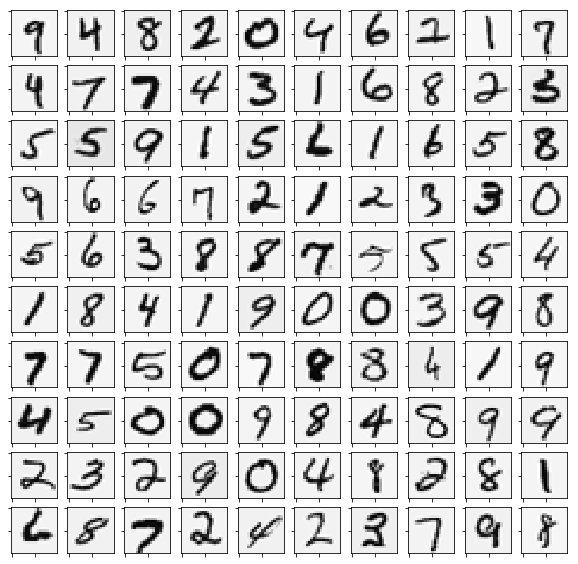

In [5]:
# display randomly selected data
displayData(sel)

## Loading Parameters

In [6]:
# we load some pre-initialized neural network parameters
weights = loadmat('ex3weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

## Implement Predict

In [7]:
# compute sigmoid of a variable
def sigmoid(z):
    g = 1./(1.+np.exp(-z))
    return g

In [8]:
# predict function predict the label of an input given a trained neural network.
def predict(theta1, theta2, X):
    m = X.shape[0]
    num_labels = theta2.shape[0]
    a1 = np.append(np.ones([m,1]), X, 1)
    z2 = np.dot(theta1,a1.T)
    a2 = sigmoid(z2)
    a2 = np.append(np.ones([1,a2.shape[1]]), a2, 0)
    z3 = np.dot(theta2, a2)
    z3 = z3.T
    p = np.argmax(sigmoid(z3), axis=1)+1
    return p

In [9]:
# make predictions on training set
pred = predict(Theta1, Theta2, X)
print("Training Set Accuracy: {}%".format(100*(pred==y).sum()/float(len(y))))

Training Set Accuracy: 97.52%


In [10]:
# predict_ex function work on one example at a time to see what it is predicting
def predict_ex(num):
    m = X.shape[1]
    fig, ax = plt.subplots(figsize=(3, 3))
    image_reshape = X[num,:].reshape(20,20).T
    ax.imshow(image_reshape, cmap = 'gray_r')
    ax.tick_params(labelbottom=False, labelleft = False)
    plt.show()
    pred = predict(Theta1, Theta2, X[num,:].reshape([1,m]))[0]
    print('\nNeural Network Prediction: {} (digit {})\n'.format(pred, np.mod(pred,10)))

--the 2940th row in X


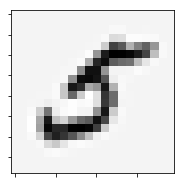


Neural Network Prediction: 5 (digit 5)

--the 3190th row in X


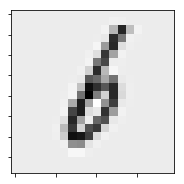


Neural Network Prediction: 6 (digit 6)

--the 2717th row in X


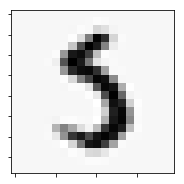


Neural Network Prediction: 5 (digit 5)

--the 3593th row in X


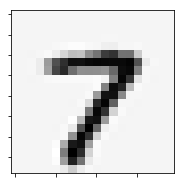


Neural Network Prediction: 7 (digit 7)

--the 985th row in X


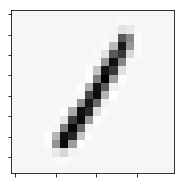


Neural Network Prediction: 1 (digit 1)

--the 1584th row in X


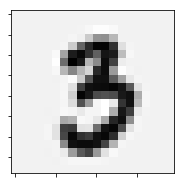


Neural Network Prediction: 3 (digit 3)

--the 4177th row in X


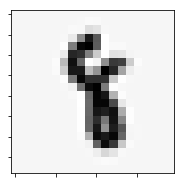


Neural Network Prediction: 8 (digit 8)

--the 3762th row in X


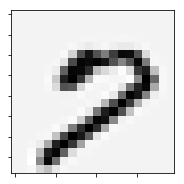


Neural Network Prediction: 7 (digit 7)

--the 15th row in X


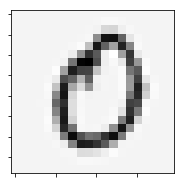


Neural Network Prediction: 10 (digit 0)

--the 3536th row in X


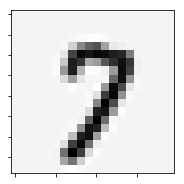


Neural Network Prediction: 7 (digit 7)



In [11]:
# randomly show 10 examples
for i in range(10):
    num = random.randint(1, m)
    print("--the {}th row in X".format(num))
    predict_ex(num)